# 1. IMPORTACIÓN DE LIBRERÍAS

Importamos las librerias necesarias para comenzar a trabajar con los datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

In [6]:
import joblib
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
from IPython.display import Image as PImage

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import metrics

In [21]:
!pip install scikeras

# 2. IMPORTACIÓN DE LOS SETS DE DATOS

Importamos la compilación de sets de datos a utilizar y vemos sus primeros registros

In [17]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'C:/Users/enfel/Downloads/Tesis/df_mora_prestamospersonales.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

In [18]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1626264
Cantidad de variables: 32


# REDES NEURONALES - TECNICAS DE BALANCEO DE DATOS

C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15247/15247 ━━━━━━━━━━━━━━━━━━━━ 12s 749us/step

Medidas de rendimiento para Sin Balanceo:
ROC-AUC: 0.9993
Precision: 0.9863
Recall: 0.9684
F1-Score: 0.9773
Accuracy: 0.9974

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9981  0.9992    0.9986  459735.0000
1                0.9863  0.9684    0.9773   28145.0000
accuracy         0.9974  0.9974    0.9974       0.9974
macro avg        0.9922  0.9838    0.9880  487880.0000
weighted avg     0.9974  0.9974    0.9974  487880.0000


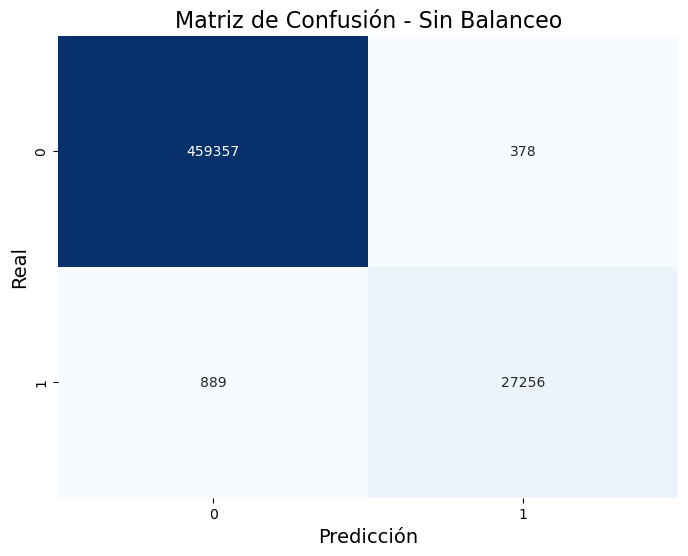

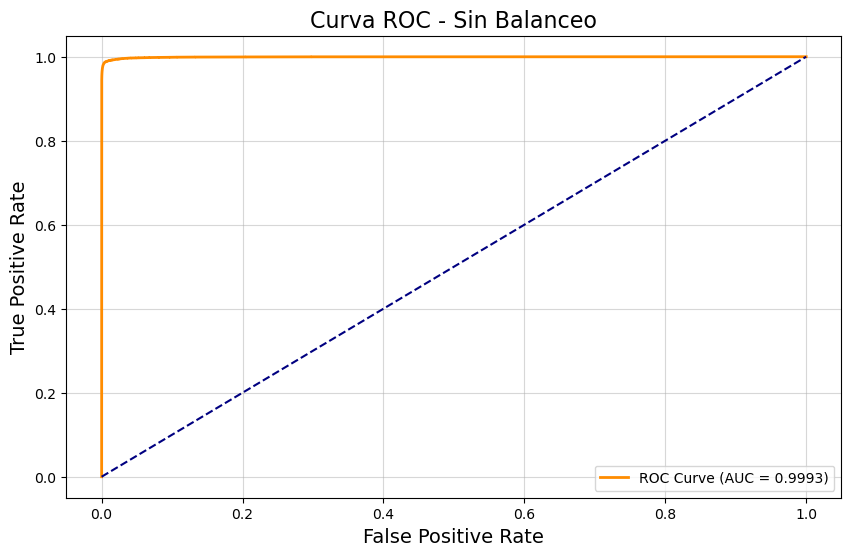

C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15247/15247 ━━━━━━━━━━━━━━━━━━━━ 11s 746us/step

Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9995
Precision: 0.9428
Recall: 0.9878
F1-Score: 0.9647
Accuracy: 0.9958

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9992  0.9963    0.9978  459735.0000
1                0.9428  0.9878    0.9647   28145.0000
accuracy         0.9958  0.9958    0.9958       0.9958
macro avg        0.9710  0.9921    0.9813  487880.0000
weighted avg     0.9960  0.9958    0.9959  487880.0000


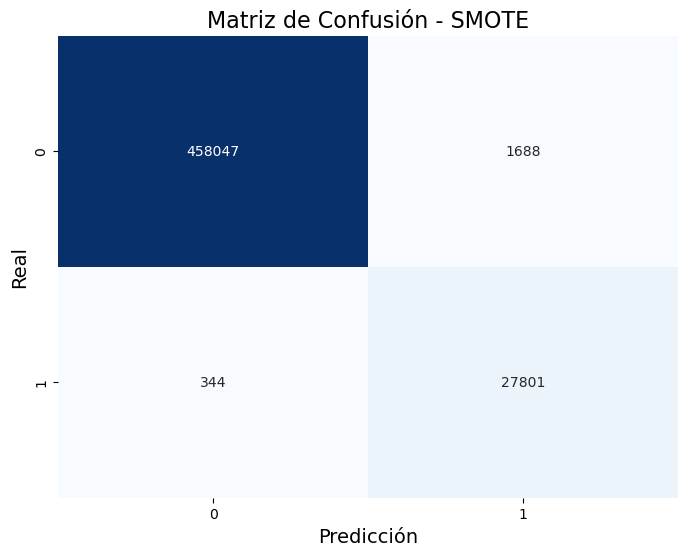

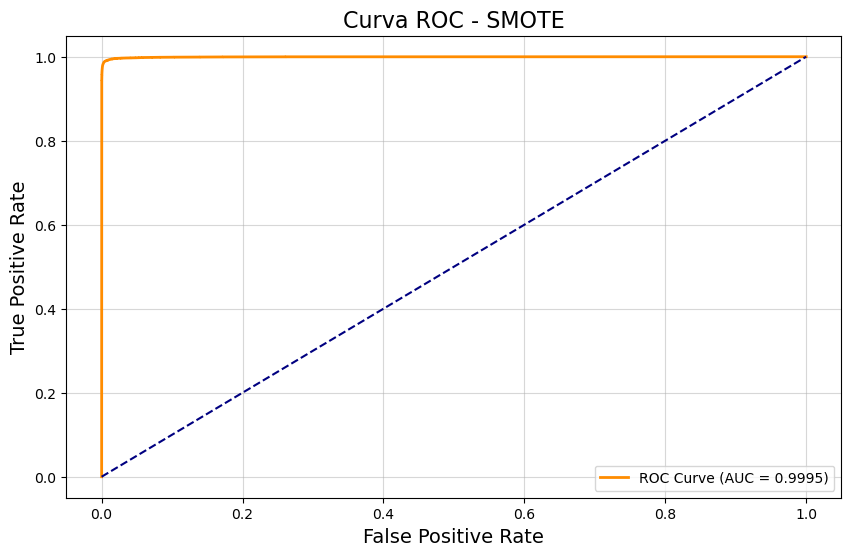

C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15247/15247 ━━━━━━━━━━━━━━━━━━━━ 12s 754us/step

Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9994
Precision: 0.9410
Recall: 0.9869
F1-Score: 0.9634
Accuracy: 0.9957

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9992  0.9962    0.9977  459735.0000
1                0.9410  0.9869    0.9634   28145.0000
accuracy         0.9957  0.9957    0.9957       0.9957
macro avg        0.9701  0.9916    0.9806  487880.0000
weighted avg     0.9958  0.9957    0.9957  487880.0000


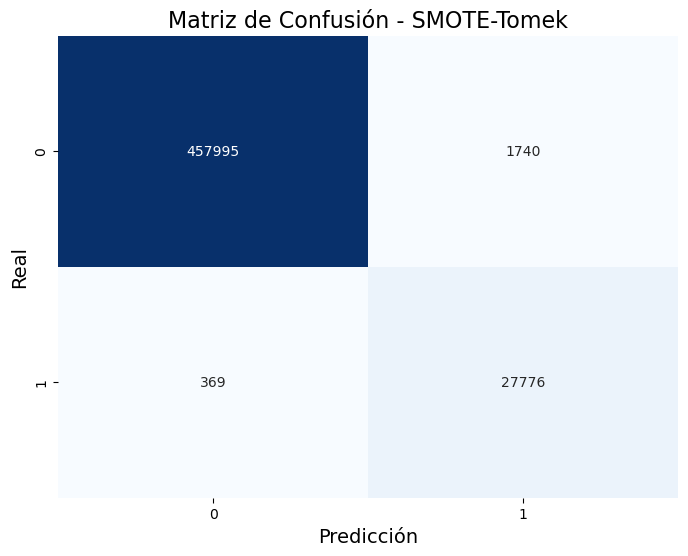

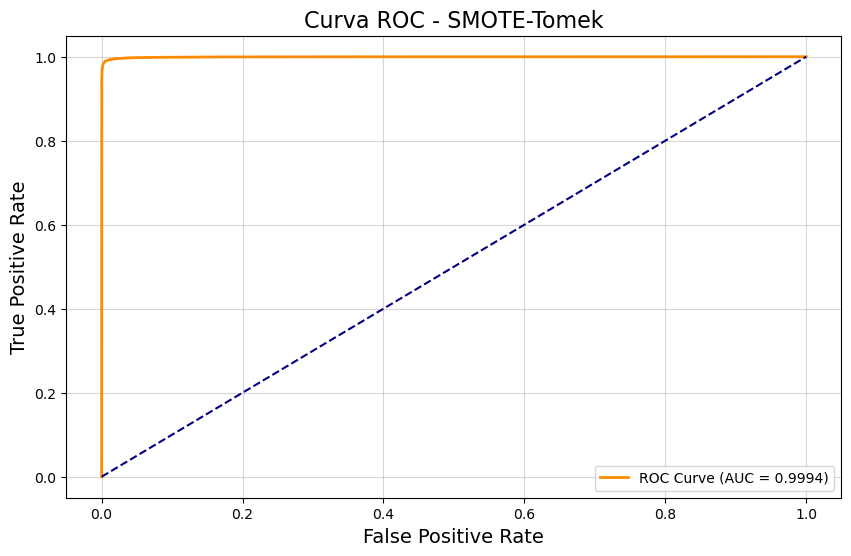


Comparativa de Técnicas de Balanceo:
               roc_auc  precision    recall        f1  accuracy
Sin Balanceo  0.999312   0.986321  0.968414  0.977285  0.997403
SMOTE         0.999474   0.942758  0.987778  0.964743  0.995835
SMOTE-Tomek   0.999434   0.941049  0.986889  0.963424  0.995677


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc,
    f1_score, 
    accuracy_score, 
    precision_score, 
    recall_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla para reproducibilidad
np.random.seed(42)

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Users/enfel/Downloads/Tesis/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir el conjunto de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para crear modelo de Red Neuronal
def crear_modelo(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,), kernel_initializer='he_normal'),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_initializer='he_normal'),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_initializer='he_normal'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Función para entrenar, predecir y evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
    # Preparar los datos
    input_shape = X_train_balanceado.shape[1]
    
    # Crear modelo
    model = crear_modelo(input_shape)
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    
    # Entrenar
    historia = model.fit(
        X_train_balanceado, 
        y_train_balanceado, 
        epochs=100, 
        batch_size=32, 
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Predicciones
    y_pred_proba = model.predict(X_test).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calcular métricas
    roc_auc = auc(*roc_curve(y_test, y_pred_proba)[:2])
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    reporte = classification_report(y_test, y_pred, output_dict=True)
    reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
    print(reporte_redondeado)
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# 1. Sin balanceo
resultados_sin_balanceo = evaluar_modelo(
    X_train_scaled, y_train, X_test_scaled, y_test, 'Sin Balanceo'
)

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
resultados_smote = evaluar_modelo(
    X_train_smote, y_train_smote, X_test_scaled, y_test, 'SMOTE'
)

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)
resultados_smote_tomek = evaluar_modelo(
    X_train_smote_tomek, y_train_smote_tomek, X_test_scaled, y_test, 'SMOTE-Tomek'
)

# Comparativa de resultados
comparativa = pd.DataFrame([
    resultados_sin_balanceo,
    resultados_smote,
    resultados_smote_tomek
], index=['Sin Balanceo', 'SMOTE', 'SMOTE-Tomek'])
print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

### MEJORES HIPERPARAMETROS

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from scikeras.wrappers import KerasClassifier

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Users/enfel/Downloads/Tesis/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista para almacenar resultados
results = []

# Configuraciones a probar
configs = [
    {'neurons': [128, 64, 32], 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32},
    {'neurons': [64, 32, 16], 'dropout': 0.1, 'lr': 0.01, 'batch_size': 64},
    {'neurons': [32, 16, 8], 'dropout': 0.3, 'lr': 0.001, 'batch_size': 16},
    {'neurons': [256, 128, 64], 'dropout': 0.2, 'lr': 0.01, 'batch_size': 32},
    {'neurons': [128, 64, 16], 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64}
]

print("Iniciando búsqueda de hiperparámetros...")

for idx, config in enumerate(configs, 1):
    print(f"\nProbando configuración {idx}/{len(configs)}")
    
    # Crear modelo
    model = Sequential([
        Dense(config['neurons'][0], activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(config['dropout']),
        Dense(config['neurons'][1], activation='relu'),
        Dropout(config['dropout']),
        Dense(config['neurons'][2], activation='relu'),
        Dropout(config['dropout']),
        Dense(1, activation='sigmoid')
    ])
    
    # Compilar modelo
    model.compile(
        optimizer=Adam(learning_rate=config['lr']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Entrenar modelo
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=config['batch_size'],
        validation_split=0.2,
        verbose=0
    )
    
    # Evaluar modelo
    y_pred_proba = model.predict(X_test_scaled, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calcular métricas
    metrics = {
        'config_id': idx,
        'neurons': str(config['neurons']),
        'dropout': config['dropout'],
        'learning_rate': config['lr'],
        'batch_size': config['batch_size'],
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }
    
    results.append(metrics)
    
    print(f"Configuración {idx}:")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")

# Convertir resultados a DataFrame y guardar
results_df = pd.DataFrame(results)
print("\nResumen de todas las configuraciones:")
print(results_df)
results_df.to_csv('C:/Tesis/Datos/resultados_nn_optimizacion.csv', index=False)

# Encontrar la mejor configuración
best_config = results_df.loc[results_df['roc_auc'].idxmax()]
print("\nMejor configuración encontrada:")
print(f"Neuronas por capa: {best_config['neurons']}")
print(f"Dropout: {best_config['dropout']}")
print(f"Learning rate: {best_config['learning_rate']}")
print(f"Batch size: {best_config['batch_size']}")
print(f"ROC-AUC: {best_config['roc_auc']:.4f}")

Iniciando búsqueda de hiperparámetros...

Probando configuración 1/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 1:
ROC-AUC: 0.9991
Precision: 0.9851
Recall: 0.9743
F1-Score: 0.9797
Accuracy: 0.9977

Probando configuración 2/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 2:
ROC-AUC: 0.9880
Precision: 0.9935
Recall: 0.9384
F1-Score: 0.9651
Accuracy: 0.9961

Probando configuración 3/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 3:
ROC-AUC: 0.9901
Precision: 0.9804
Recall: 0.9670
F1-Score: 0.9737
Accuracy: 0.9970

Probando configuración 4/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 4:
ROC-AUC: 0.9660
Precision: 0.9638
Recall: 0.9324
F1-Score: 0.9478
Accuracy: 0.9941

Probando configuración 5/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 5:
ROC-AUC: 0.9993
Precision: 0.9872
Recall: 0.9762
F1-Score: 0.9817
Accuracy: 0.9979

Resumen de todas las configuraciones:
   config_id         neurons  dropout  learning_rate  batch_size   roc_auc  \
0          1   [128, 64, 32]      0.2          0.001          32  0.999136   
1          2    [64, 32, 16]      0.1          0.010          64  0.987959   
2          3     [32, 16, 8]      0.3          0.001          16  0.990143   
3          4  [256, 128, 64]      0.2          0.010          32  0.965975   
4          5   [128, 64, 16]      0.1          0.001          64  0.999268   

   precision    recall        f1  accuracy  
0   0.985091  0.974276  0.979654  0.997665  
1   0.993492  0.938355  0.965137  0.996089  
2   0.980404  0.967028  0.973670  0.996983  
3   0.963821  0.932350  0.947825  0.994078  
4   0.987244  0.976159  0.981670  0.997897  

Mejor configuración encontrada:
Neuronas por capa: [128, 64, 16]
Dropout: 0.1
Learning rate: 0.001
Batch size: 64
ROC-AUC

### REDES NEURONALES - CROSS VALIDATION

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Users/enfel/Downloads/Tesis/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Mejores hiperparámetros encontrados (actualizados)
neurons = [128, 64, 16]  # Cambiado
dropout_rate = 0.1      # Cambiado 
learning_rate = 0.001   # Igual
batch_size = 64        # Cambiado

# Función para crear el modelo
def create_model(input_dim):
   model = Sequential([
       Dense(neurons[0], activation='relu', input_dim=input_dim),
       Dropout(dropout_rate),
       Dense(neurons[1], activation='relu'),
       Dropout(dropout_rate),
       Dense(neurons[2], activation='relu'),
       Dropout(dropout_rate),
       Dense(1, activation='sigmoid')
   ])
   
   model.compile(
       optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy']
   )
   
   return model

# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
train_scores = []
val_scores = []
fold_metrics = []

# Realizar validación cruzada
print(f"Iniciando validación cruzada con {n_splits} folds...")
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
   print(f"\nFold {fold}/{n_splits}")
   
   # Dividir datos
   X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
   y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
   
   # Escalar características
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_val_scaled = scaler.transform(X_val)
   
   # Crear y entrenar modelo
   model = create_model(X.shape[1])
   history = model.fit(
       X_train_scaled, y_train,
       validation_data=(X_val_scaled, y_val),
       epochs=100,
       batch_size=batch_size,
       verbose=0
   )
   
   # Evaluar modelo
   train_pred_proba = model.predict(X_train_scaled, verbose=0)
   val_pred_proba = model.predict(X_val_scaled, verbose=0)
   
   train_pred = (train_pred_proba > 0.5).astype(int)
   val_pred = (val_pred_proba > 0.5).astype(int)
   
   # Calcular métricas
   train_metrics = {
       'roc_auc': roc_auc_score(y_train, train_pred_proba),
       'precision': precision_score(y_train, train_pred),
       'recall': recall_score(y_train, train_pred),
       'f1': f1_score(y_train, train_pred),
       'accuracy': accuracy_score(y_train, train_pred)
   }
   
   val_metrics = {
       'roc_auc': roc_auc_score(y_val, val_pred_proba),
       'precision': precision_score(y_val, val_pred),
       'recall': recall_score(y_val, val_pred),
       'f1': f1_score(y_val, val_pred),
       'accuracy': accuracy_score(y_val, val_pred)
   }
   
   train_scores.append(train_metrics)
   val_scores.append(val_metrics)
   
   print(f"\nMétricas de entrenamiento:")
   for metric, value in train_metrics.items():
       print(f"{metric}: {value:.4f}")
   
   print(f"\nMétricas de validación:")
   for metric, value in val_metrics.items():
       print(f"{metric}: {value:.4f}")

# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()

print("\nResumen de validación cruzada:")
print("\nPromedios en entrenamiento:")
for metric in train_means.index:
   print(f"{metric}: {train_means[metric]:.4f} ± {train_stds[metric]:.4f}")

print("\nPromedios en validación:")
for metric in val_means.index:
   print(f"{metric}: {val_means[metric]:.4f} ± {val_stds[metric]:.4f}")

# Evaluar diferencia entre entrenamiento y validación
print("\nDiferencia entre entrenamiento y validación:")
for metric in train_means.index:
   diff = train_means[metric] - val_means[metric]
   print(f"{metric}: {abs(diff):.4f}")

Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas de entrenamiento:
roc_auc: 0.9999
precision: 0.9946
recall: 0.9828
f1: 0.9887
accuracy: 0.9987

Métricas de validación:
roc_auc: 0.9996
precision: 0.9901
recall: 0.9783
f1: 0.9842
accuracy: 0.9982

Fold 2/5

Métricas de entrenamiento:
roc_auc: 0.9999
precision: 0.9930
recall: 0.9847
f1: 0.9889
accuracy: 0.9987

Métricas de validación:
roc_auc: 0.9993
precision: 0.9883
recall: 0.9779
f1: 0.9831
accuracy: 0.9981

Fold 3/5

Métricas de entrenamiento:
roc_auc: 0.9999
precision: 0.9973
recall: 0.9794
f1: 0.9882
accuracy: 0.9987

Métricas de validación:
roc_auc: 0.9995
precision: 0.9930
recall: 0.9693
f1: 0.9810
accuracy: 0.9978

Fold 4/5

Métricas de entrenamiento:
roc_auc: 0.9999
precision: 0.9960
recall: 0.9818
f1: 0.9888
accuracy: 0.9987

Métricas de validación:
roc_auc: 0.9994
precision: 0.9915
recall: 0.9758
f1: 0.9836
accuracy: 0.9981

Fold 5/5

Métricas de entrenamiento:
roc_auc: 0.9999
precision: 0.9952
recall: 0.9836
f

### REDES NEURONALES - INCORPORACIÓN DE DATOS NUVOS

Cargando datos...

Entrenando modelo...


C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15247/15247 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
15247/15247 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
4226/4226 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4226/4226 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

Comparación de Métricas:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9980        0.9291  0.0689
1  Precision                     0.9918        0.8800  0.1118
2     Recall                     0.9727        0.0023  0.9704
3   F1-Score                     0.9822        0.0046  0.9776
4    ROC-AUC                     0.9994        0.7723  0.2271


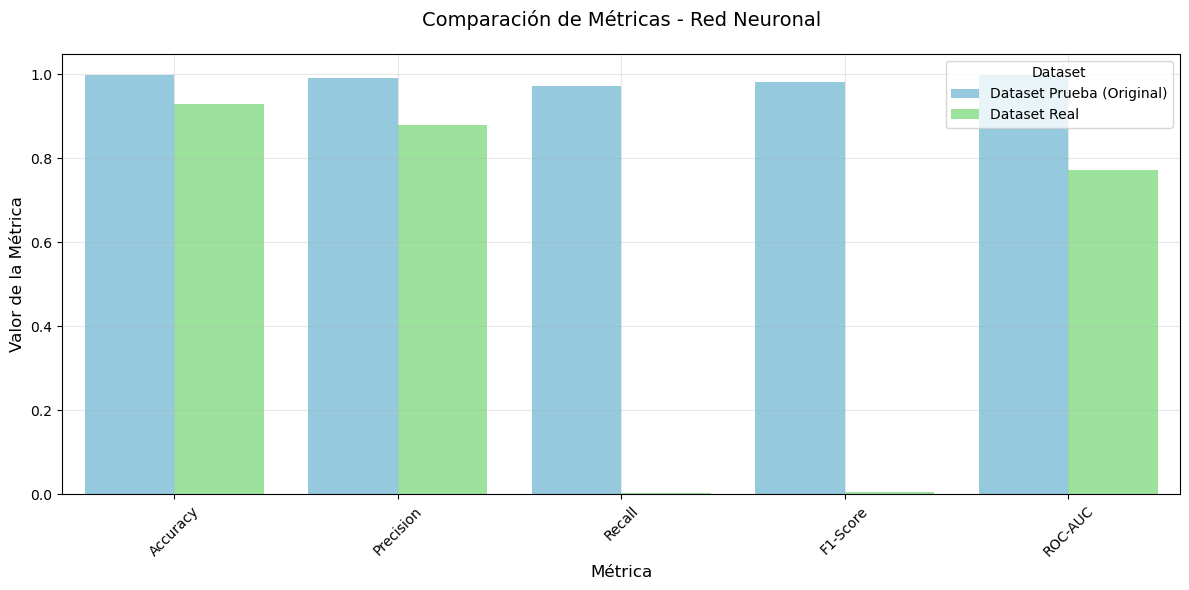

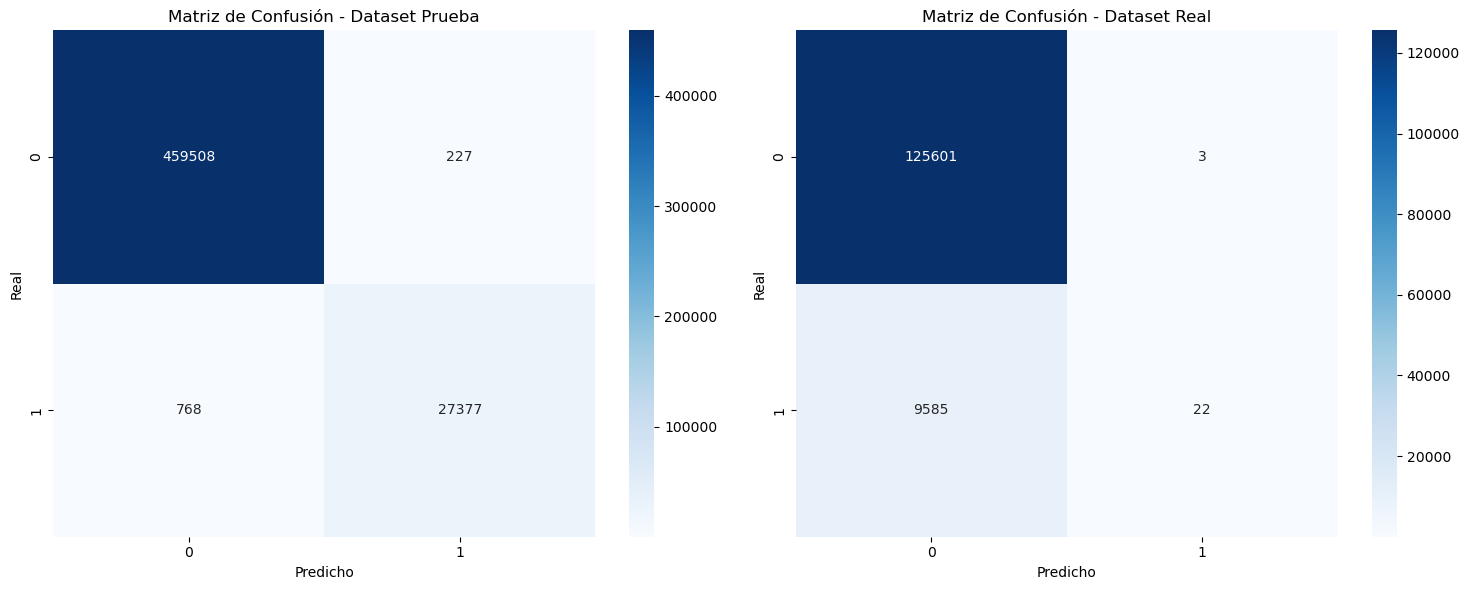


Resultados guardados en:
- comparacion_metricas_nn.png
- matrices_confusion_nn.png
- resultados_red_neuronal.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
   roc_auc_score,
   precision_score,
   recall_score,
   f1_score,
   accuracy_score,
   confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

def create_model(input_dim):
   model = Sequential([
       Dense(128, activation='relu', input_dim=input_dim),
       Dropout(0.1),
       Dense(64, activation='relu'),
       Dropout(0.1),
       Dense(16, activation='relu'),
       Dropout(0.1),
       Dense(1, activation='sigmoid')
   ])
   
   model.compile(
       optimizer=Adam(learning_rate=0.001),
       loss='binary_crossentropy',
       metrics=['accuracy']
   )
   
   return model

def calcular_metricas(y_true, y_pred, y_pred_proba):
   return {
       'Accuracy': accuracy_score(y_true, y_pred),
       'Precision': precision_score(y_true, y_pred),
       'Recall': recall_score(y_true, y_pred),
       'F1-Score': f1_score(y_true, y_pred),
       'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
   }

# Cargar datasets
print("Cargando datos...")
df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales_012024.csv')

# Preparar datos
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad']
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
   X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_nuevo_scaled = scaler.transform(X_nuevo)

# Crear y entrenar modelo
print("\nEntrenando modelo...")
model = create_model(X_train.shape[1])
history = model.fit(
   X_train_scaled, y_train,
   validation_data=(X_test_scaled, y_test),
   epochs=100,
   batch_size=64,
   verbose=0
)

# Predicciones
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
y_test_pred_proba = model.predict(X_test_scaled)

y_nuevo_pred = (model.predict(X_nuevo_scaled) > 0.5).astype(int)
y_nuevo_pred_proba = model.predict(X_nuevo_scaled)

# Calcular métricas
metricas_test = calcular_metricas(y_test, y_test_pred, y_test_pred_proba)
metricas_nuevo = calcular_metricas(y_nuevo, y_nuevo_pred, y_nuevo_pred_proba)

# Crear DataFrame comparativo
comparacion_metricas = pd.DataFrame({
   'Métrica': list(metricas_test.keys()),
   'Dataset Prueba (Original)': list(metricas_test.values()),
   'Dataset Real': list(metricas_nuevo.values()),
   'Desvío': [abs(metricas_test[m] - metricas_nuevo[m]) for m in metricas_test.keys()]
}).round(4)

# Mostrar resultados
print("\nComparación de Métricas:")
print(comparacion_metricas)

# Visualizar comparación
plt.figure(figsize=(12, 6))
sns.barplot(
   data=comparacion_metricas.melt(id_vars='Métrica', 
                                 value_vars=['Dataset Prueba (Original)', 'Dataset Real']),
   x='Métrica', 
   y='value', 
   hue='variable',
   palette=['skyblue', 'lightgreen']
)

plt.title("Comparación de Métricas - Red Neuronal", fontsize=14, pad=20)
plt.ylabel("Valor de la Métrica", fontsize=12)
plt.xlabel("Métrica", fontsize=12)
plt.legend(title="Dataset", title_fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparacion_metricas_nn.png')
plt.show()

# Matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Dataset de prueba
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Dataset Prueba')
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicho')

# Dataset nuevo
sns.heatmap(confusion_matrix(y_nuevo, y_nuevo_pred), 
           annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de Confusión - Dataset Real')
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicho')

plt.tight_layout()
plt.savefig('matrices_confusion_nn.png')
plt.show()

# Guardar resultados
comparacion_metricas.to_csv('resultados_red_neuronal.csv', index=False)

# Imprimir resumen
print("\nResultados guardados en:")
print("- comparacion_metricas_nn.png")
print("- matrices_confusion_nn.png")
print("- resultados_red_neuronal.csv")

Cargando datos...
Preparando datos...
Entrenando modelo...


C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Calculando métricas...

Comparación de Métricas:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9979        0.9292  0.0687
1  Precision                     0.9913        0.9143  0.0770
2     Recall                     0.9716        0.0033  0.9683
3   F1-Score                     0.9814        0.0066  0.9748
4    ROC-AUC                     0.9992        0.7018  0.2974

Generando visualizaciones...
15247/15247 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
4226/4226 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


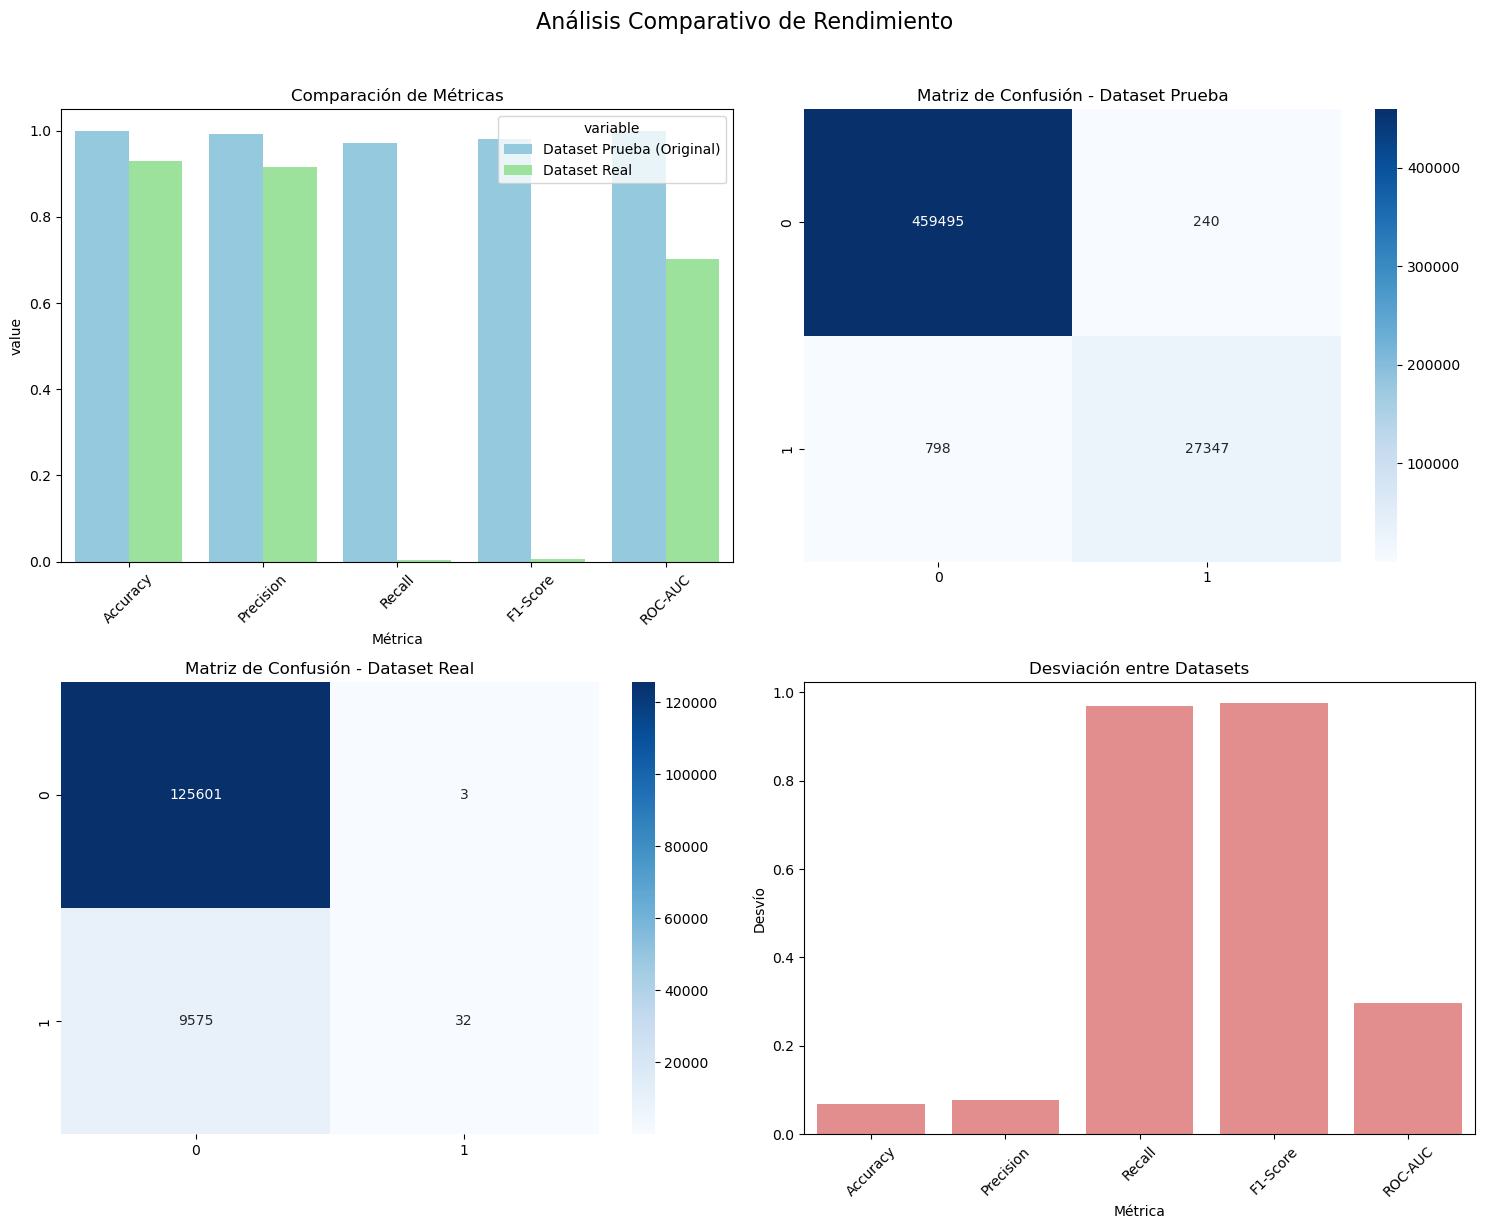

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    roc_auc_score, recall_score, f1_score,
    accuracy_score, precision_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Configurar semillas para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# Optimizar la lectura de datos usando dtypes específicos
print("Cargando datos...")
dtypes = {
    'Morosidad': 'int8'  # Asumiendo que Morosidad es binaria
}

df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv', dtype=dtypes)
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales_012024.csv', dtype=dtypes)

# Separar características y variable objetivo eficientemente
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad'].values
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad'].values

# Limpiar memoria
del df_mora_prestamos_original
del nuevo_dataset

# Asegurar nombres consistentes
X_original.columns = X_original.columns.str.replace(' ', '_')
X_nuevo.columns = X_nuevo.columns.str.replace(' ', '_')

print("Preparando datos...")
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_nuevo_scaled = scaler.transform(X_nuevo)

# Limpiar más memoria
del X_original
del y_original

def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def calcular_metricas(model, X, y):
    # Calcular predicciones en lotes
    batch_size = 10000
    n_samples = len(X)
    y_pred = np.zeros(n_samples)
    y_pred_proba = np.zeros(n_samples)
    
    for i in range(0, n_samples, batch_size):
        end = min(i + batch_size, n_samples)
        batch_pred_proba = model.predict(X[i:end], verbose=0)
        y_pred_proba[i:end] = batch_pred_proba.ravel()
        y_pred[i:end] = (batch_pred_proba > 0.5).ravel()
    
    return {
        'Accuracy': round(accuracy_score(y, y_pred), 4),
        'Precision': round(precision_score(y, y_pred), 4),
        'Recall': round(recall_score(y, y_pred), 4),
        'F1-Score': round(f1_score(y, y_pred), 4),
        'ROC-AUC': round(roc_auc_score(y, y_pred_proba), 4)
    }

print("Entrenando modelo...")
model = create_model()
history = model.fit(
    X_train_scaled, y_train,
    batch_size=64,
    epochs=100,
    verbose=0
)

print("Calculando métricas...")
metricas_test = calcular_metricas(model, X_test_scaled, y_test)
metricas_nuevo = calcular_metricas(model, X_nuevo_scaled, y_nuevo)

# Crear DataFrame de comparación
comparacion_metricas = pd.DataFrame({
    'Métrica': list(metricas_test.keys()),
    'Dataset Prueba (Original)': list(metricas_test.values()),
    'Dataset Real': list(metricas_nuevo.values()),
    'Desvío': [round(abs(metricas_test[m] - metricas_nuevo[m]), 4) for m in metricas_test]
})

print("\nComparación de Métricas:")
print(comparacion_metricas)

print("\nGenerando visualizaciones...")
# Crear una sola figura con todos los plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Comparativo de Rendimiento', fontsize=16, y=1.02)

# 1. Gráfico de barras - Métricas
sns.barplot(
    data=comparacion_metricas.melt(
        id_vars='Métrica', 
        value_vars=['Dataset Prueba (Original)', 'Dataset Real']
    ),
    x='Métrica',
    y='value',
    hue='variable',
    palette=['skyblue', 'lightgreen'],
    ax=axes[0,0]
)
axes[0,0].set_title('Comparación de Métricas')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Matriz de confusión - Dataset Prueba
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('Matriz de Confusión - Dataset Prueba')

# 3. Matriz de confusión - Dataset Nuevo
y_nuevo_pred = (model.predict(X_nuevo_scaled) > 0.5).astype(int)
cm_nuevo = confusion_matrix(y_nuevo, y_nuevo_pred)
sns.heatmap(cm_nuevo, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Matriz de Confusión - Dataset Real')

# 4. Gráfico de desviaciones
sns.barplot(
    data=comparacion_metricas,
    x='Métrica',
    y='Desvío',
    color='lightcoral',
    ax=axes[1,1]
)
axes[1,1].set_title('Desviación entre Datasets')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import (roc_curve, auc, roc_auc_score, precision_score, 
                          recall_score, f1_score, accuracy_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import json

# Cargar datos
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configurar y entrenar modelo con los mejores hiperparámetros
def create_model():
   model = Sequential([
       Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
       Dropout(0.1),
       Dense(64, activation='relu'),
       Dropout(0.1),
       Dense(16, activation='relu'),
       Dropout(0.1),
       Dense(1, activation='sigmoid')
   ])
   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
   return model

print("Entrenando modelo de Red Neuronal...")
model = create_model()
history = model.fit(X_train_scaled, y_train,
                  batch_size=64,
                  epochs=100,
                  verbose=0)

# Realizar predicciones
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calcular métricas
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

metrics = {
   'ROC_AUC': roc_auc_score(y_test, y_pred_proba),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'Specificity': specificity,
   'F1_Score': f1_score(y_test, y_pred),
   'Accuracy': accuracy_score(y_test, y_pred)
}

# Calcular datos para curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Crear directorio para resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f'D:/Tesis/Definitivos/nuevo/neural_network_results_{timestamp}'
os.makedirs(result_dir, exist_ok=True)

# 1. Graficar y guardar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Red Neuronal')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.savefig(f'{result_dir}/confusion_matrix.png')
plt.close()

# 2. Graficar y guardar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Red Neuronal')
plt.legend(loc="lower right")
plt.savefig(f'{result_dir}/roc_curve.png')
plt.close()

# 3. Graficar Recall y Especificidad
plt.figure(figsize=(8, 6))
metrics_plot = [metrics['Recall'], metrics['Specificity']]
plt.bar(['Recall (Sensibilidad)', 'Especificidad'], metrics_plot, color=['skyblue', 'lightgreen'])
plt.title('Recall vs Especificidad - Red Neuronal')
plt.ylim([0, 1])
for i, v in enumerate(metrics_plot):
   plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.savefig(f'{result_dir}/recall_specificity.png')
plt.close()

# Guardar todos los resultados
results = {
   'model_name': 'Neural_Network',
   'hyperparameters': {
       'architecture': [128, 64, 16],
       'dropout_rate': 0.1,
       'batch_size': 64,
       'learning_rate': 0.001,
       'epochs': 100,
       'optimizer': 'adam',
       'loss': 'binary_crossentropy'
   },
   'metrics': metrics,
   'confusion_matrix': cm.tolist(),
   'class_distribution': {
       'train': {
           'class_0': int(sum(y_train == 0)),
           'class_1': int(sum(y_train == 1))
       }
   },
   'roc_data': {
       'fpr': fpr.tolist(),
       'tpr': tpr.tolist(),
       'roc_auc': roc_auc,
       'thresholds': thresholds.tolist()
   },
   'sensitivity_specificity': {
       'recall': float(metrics['Recall']),
       'specificity': float(metrics['Specificity']),
       'confusion_matrix_values': {
           'tn': int(tn),
           'fp': int(fp),
           'fn': int(fn),
           'tp': int(tp)
       }
   }
}

# Guardar resultados en JSON
with open(f'{result_dir}/model_results.json', 'w') as f:
   json.dump(results, f, indent=4)

# Imprimir resultados en consola
print("\nResultados del modelo Red Neuronal:")
print("="*40)
print("\nMétricas principales:")
for metric, value in metrics.items():
   print(f"{metric}: {value:.4f}")

print("\nMatriz de Confusión:")
print(cm)

print(f"\nResultados guardados en: {result_dir}")

Entrenando modelo de Red Neuronal...


C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15247/15247 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step

Resultados del modelo Red Neuronal:

Métricas principales:
ROC_AUC: 0.9992
Precision: 0.9849
Recall: 0.9779
Specificity: 0.9991
F1_Score: 0.9814
Accuracy: 0.9979

Matriz de Confusión:
[[459314    421]
 [   621  27524]]

Resultados guardados en: D:/Tesis/Definitivos/nuevo/neural_network_results_20250204_102600


Cargando datos...
Preparando datos...
Entrenando modelo...


C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Realizando predicciones...
15247/15247 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


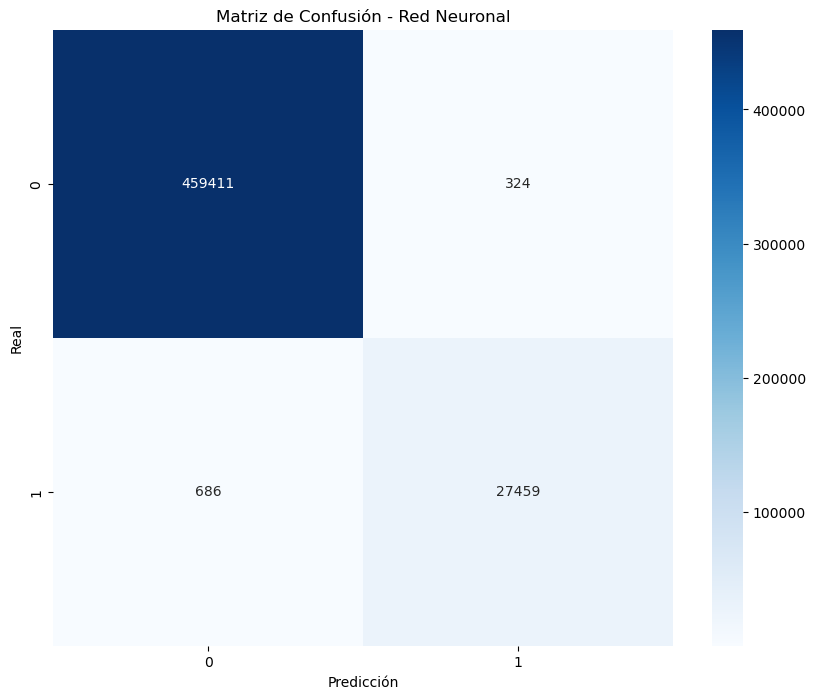


Métricas en conjunto de prueba:
ROC-AUC: 0.9993
Precision: 0.9883
Recall: 0.9756
F1-Score: 0.9819
Accuracy: 0.9979
Especificidad: 0.9993

Tiempo de ejecución: 1:16:06.509498


In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Iniciar el tiempo
start_time = datetime.now()

# Cargar dataset
print("Cargando datos...")
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
print("Preparando datos...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo con los mejores hiperparámetros
def create_model(input_dim):  # Agregar el parámetro
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model


# Entrenar el modelo
print("Entrenando modelo...")
model = create_model(X_train.shape[1])
history = model.fit(
    X_train_scaled, y_train,
    batch_size=64,
    epochs=100,
    verbose=0
)

# Realizar predicciones
print("Realizando predicciones...")
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calcular métricas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)

metrics = {
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred),
    'Especificidad': especificidad
}

# Calcular tiempo de ejecución
end_time = datetime.now()
execution_time = end_time - start_time

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Red Neuronal')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Imprimir métricas y tiempo de ejecución
print('\nMétricas en conjunto de prueba:')
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

print(f'\nTiempo de ejecución: {execution_time}')

# Guardar los mejores parámetros
best_params = {
    'neurons': [128, 64, 16],
    'dropout_rate': 0.1,
    'learning_rate': 0.001,
    'batch_size': 64,
    'epochs': 100
}

pd.DataFrame([best_params]).to_csv('mejores_parametros_red_neuronal.csv', index=False)